# ML Course 4 - Practice (multiple and polynomial regressions)

## Subject

We will use here the same data set as for practice #3.

**`FuelConsumption.csv`** is a vehicle fuel consumption data set that contains model-specific fuel consumption.
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns

In [2]:
data = pd.read_csv("FuelConsumption.csv")

In [3]:
data.sample(6)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1059,2014,VOLVO,S80,MID-SIZE,3.2,6,AS6,X,11.9,8.1,10.2,28,235
835,2014,NISSAN,370Z ROADSTER,TWO-SEATER,3.7,6,M6,Z,13.5,9.6,11.7,24,269
388,2014,FORD,F150 FFV 4X4,PICKUP TRUCK - STANDARD,5.0,8,A6,E,22.4,17.0,20.0,14,320
52,2014,AUDI,RS5,SUBCOMPACT,4.2,8,A7,Z,15.3,10.9,13.3,21,306
556,2014,JAGUAR,XJ SUPERCHARGED,FULL-SIZE,5.0,8,AS8,Z,15.8,10.2,13.3,21,306
960,2014,SUBARU,OUTBACK AWD,SUV - SMALL,3.6,6,AS5,X,13.4,9.7,11.7,24,269


In [34]:
data.drop(['MODEL'], axis=1, inplace = True)

* Make some plots of 'CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', with respect to 'CO2EMISSIONS'.

In [35]:
#data inspection
correlation = data.corr()
correlation

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


<AxesSubplot:>

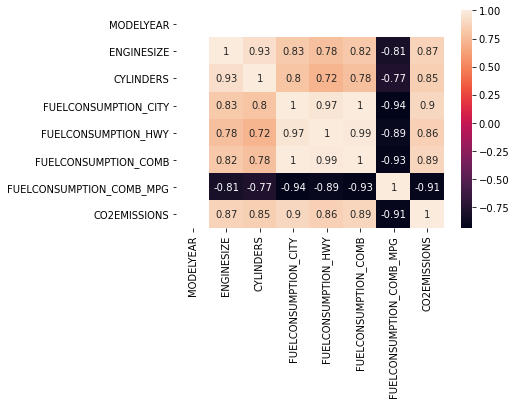

In [36]:
sns.heatmap(data.corr(), annot = True)


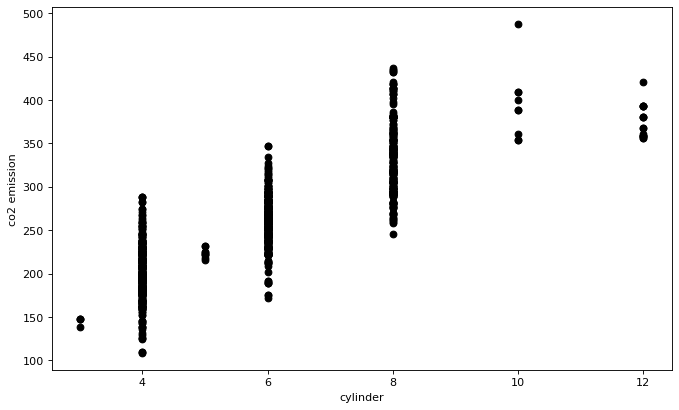

In [37]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(data['CYLINDERS'], data['CO2EMISSIONS'], c='black')
plt.xlabel("cylinder")
plt.ylabel("co2 emission")
plt.show()

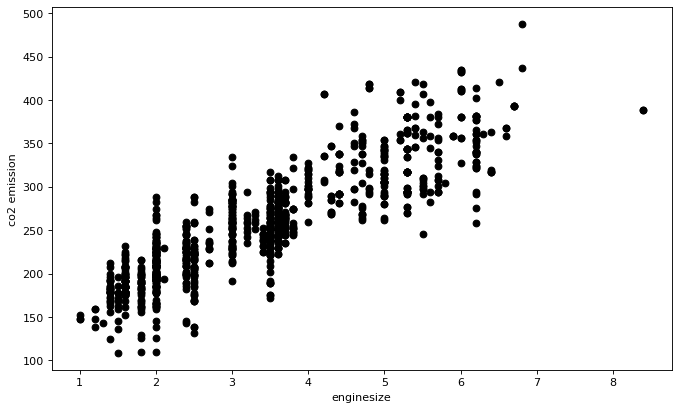

In [38]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'], c='black')
plt.xlabel("enginesize")
plt.ylabel("co2 emission")
plt.show()

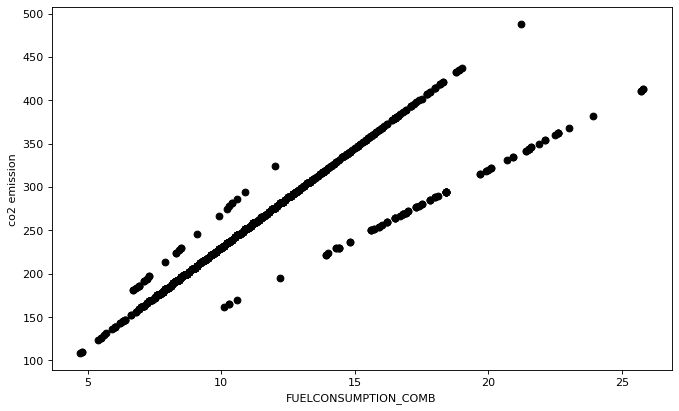

In [39]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(data['FUELCONSUMPTION_COMB'], data['CO2EMISSIONS'], c='black')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("co2 emission")
plt.show()

* Train a multiple linear regression with these three predictors. What are the coefficients associated with each predictor?

In [63]:
#data preparation
X = data.drop(['CO2EMISSIONS','VEHICLECLASS','FUELTYPE','TRANSMISSION'], axis=1)
y = data['CO2EMISSIONS'].values.reshape(-1,1)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [65]:
#single linera regression(fuelcnsumption_comb)
from sklearn.linear_model import LinearRegression
reg_single = LinearRegression()
reg_single.fit(X_train['FUELCONSUMPTION_COMB'].values.reshape(-1,1), y_train)

LinearRegression()

In [66]:
y_pred = reg_single.predict(X_test['FUELCONSUMPTION_COMB'].values.reshape(-1,1))
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

Residual sum of squares (RSS): 309995.19
Mean absolute error (MAE): 20.34
Mean square error (MSE): 870.77
Root mean square error (RMSE): 29.51


In [67]:
X_train.head()


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
651,2014,3.0,6,19.4,14.8,17.3,16
304,2014,5.7,8,15.8,9.2,12.8,22
883,2014,3.8,6,13.7,9.6,11.9,24
994,2014,3.5,6,12.9,9.4,11.3,25
1027,2014,2.0,4,11.6,7.7,9.8,29


,MODELYEAR,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2014,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33
1,2014,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29
2,2014,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48
3,2014,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25
4,2014,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27
5,2014,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28
6,2014,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28
7,2014,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25
8,2014,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24
9,2014,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31


In [68]:
#multiple linear regression
reg_multiple = LinearRegression()
reg_multiple.fit(X_train, y_train)
print("The linear model is: Y = {:.5} + {:.5}*CYLINDERS + {:.5}*ENGINESIZE + {:.5}*FUELCONSUMPTION_COMB".format(reg_multiple.intercept_[0], reg_multiple.coef_[0][0], reg_multiple.coef_[0][1], reg_multiple.coef_[0][2]))

The linear model is: Y = 249.75 + 0.0*CYLINDERS + 7.9325*ENGINESIZE + 8.2541*FUELCONSUMPTION_COMB


In [46]:
X.head()

,MODELYEAR,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2014,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33
1,2014,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29
2,2014,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48
3,2014,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25
4,2014,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27


C:\Users\kaust\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


* What is the accuracy of this model? What do you think, when compared with the accuracy of the linear regression with 'FUELCONSUMPTION_COMB' as single predictor (computed in last question of practice #3)?

In [70]:
#singlellinear regression
y_pred = reg_single.predict(X_test['FUELCONSUMPTION_COMB'].values.reshape(-1,1))
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

Residual sum of squares (RSS): 309995.19
Mean absolute error (MAE): 20.34
Mean square error (MSE): 870.77
Root mean square error (RMSE): 29.51


In [69]:
#multiple regression
y_pred = reg_multiple.predict(X_test)
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

Residual sum of squares (RSS): 175510.15
Mean absolute error (MAE): 14.65
Mean square error (MSE): 493.01
Root mean square error (RMSE): 22.20


* 'FUELCONSUMPTION_CITY' is the urban consumption while FUELCONSUMPTION_HWY is the consumption on the highway. 'FUELCONSUMPTION_COMB' is the combined consumption and is computed as a weighted sum of 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY' so to represent a standard driver behaviour. How are these three features correlated between each other?

* Add 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY' as additional predictors to your model of question #2. What is the gain of accuracy, and how do you interpret that?

In [71]:
#multiple linear regression
reg_multiple = LinearRegression()
reg_multiple.fit(X_train, y_train)
print("The linear model is: Y = {:.5} + {:.5}*CYLINDERS + {:.5}*ENGINESIZE + {:.5}*FUELCONSUMPTION_CITY + {:.5}*FUELCONSUMPTION_HWY +{:.5}*FUELCONSUMPTION_COMB".format(reg_multiple.intercept_[0], reg_multiple.coef_[0][0], reg_multiple.coef_[0][1], reg_multiple.coef_[0][2], reg_multiple.coef_[0][3], reg_multiple.coef_[0][4]))

The linear model is: Y = 249.75 + 0.0*CYLINDERS + 7.9325*ENGINESIZE + 8.2541*FUELCONSUMPTION_CITY + -10.453*FUELCONSUMPTION_HWY +-4.4453*FUELCONSUMPTION_COMB


In [73]:
X_test.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
766,2014,5.5,8,17.2,13.5,15.5,18
204,2014,2.4,4,10.5,7.3,9.1,31
629,2014,2.4,4,11.4,8.3,10.0,28
897,2014,2.7,6,10.7,7.4,9.2,31
711,2014,2.5,4,8.2,6.1,7.3,39


In [72]:
#multiple regression update
y_pred = reg_multiple.predict(X_test)
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

Residual sum of squares (RSS): 175510.15
Mean absolute error (MAE): 14.65
Mean square error (MSE): 493.01
Root mean square error (RMSE): 22.20


* Bonus (no penalty if not done): Plot 'CO2EMISSIONS' with respect to 'FUELCONSUMPTION_COMB' for each possible value of 'FUELTYPE' (i.e. plot the scatter dots with one distinct color for each value of 'FUELTYPE'). Do you think that 'FUELTYPE' and 'FUELCONSUMPTION_COMB' could be sufficient predictors for 'CO2EMISSIONS' estimation with a multiple linear regression model? Compute the accuracy.

In [7]:
data.head(100)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2014,BMW,435i COUPE,COMPACT,3.0,6,M6,Z,11.8,7.9,10.0,28,230
96,2014,BMW,435i xDRIVE COUPE,COMPACT,3.0,6,A8,Z,11.7,7.8,9.9,29,228
97,2014,BMW,435i xDRIVE COUPE,COMPACT,3.0,6,M6,Z,11.9,8.3,10.3,27,237
98,2014,BMW,528i,MID-SIZE,2.0,4,A8,Z,10.2,7.0,8.8,32,202


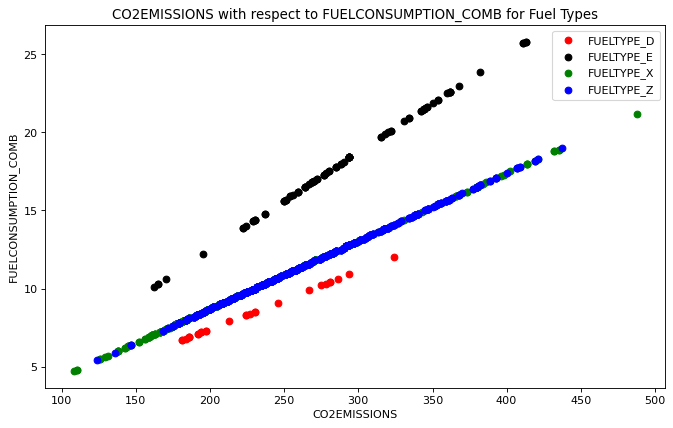

In [9]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(data[data['FUELTYPE']=='D']['CO2EMISSIONS'], data[data['FUELTYPE']=='D']['FUELCONSUMPTION_COMB'], color = 'red', label = 'FUELTYPE_D')
plt.scatter(data[data['FUELTYPE']=='E']['CO2EMISSIONS'], data[data['FUELTYPE']=='E']['FUELCONSUMPTION_COMB'], color = 'black', label = 'FUELTYPE_E')
plt.scatter(data[data['FUELTYPE']=='X']['CO2EMISSIONS'], data[data['FUELTYPE']=='X']['FUELCONSUMPTION_COMB'], color = 'green', label = 'FUELTYPE_X')
plt.scatter(data[data['FUELTYPE']=='Z']['CO2EMISSIONS'], data[data['FUELTYPE']=='Z']['FUELCONSUMPTION_COMB'], color = 'blue', label = 'FUELTYPE_Z')

plt.title('CO2EMISSIONS with respect to FUELCONSUMPTION_COMB for Fuel Types')
plt.xlabel('CO2EMISSIONS')
plt.ylabel('FUELCONSUMPTION_COMB')
plt.legend()
plt.show()


In [20]:
#Data Preparation
X1 =data.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS', 'TRANSMISSION', 'FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'CO2EMISSIONS' ], axis=1)
y1 = data['CO2EMISSIONS'].values.reshape(-1,1)

In [21]:
X1.head()

,FUELTYPE,FUELCONSUMPTION_COMB
0,Z,8.5
1,Z,9.6
2,Z,5.9
3,Z,11.1
4,Z,10.6


In [24]:
# since fuel type is categorical data 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(X1['FUELTYPE'])
X1['FUELTYPE'] = label_encoder.transform(X1['FUELTYPE'])
print(X1[:6])



   FUELTYPE  FUELCONSUMPTION_COMB
0         3                   8.5
1         3                   9.6
2         3                   5.9
3         3                  11.1
4         3                  10.6
5         3                  10.0


In [25]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 1/3, random_state = 0)

In [27]:
#Multiple linear regression
from sklearn.linear_model import LinearRegression
reg_multiple = LinearRegression()
reg_multiple.fit(X1_train, y1_train)
print("The linear model is: Y = {:.5} + {:.5}*FUELTYPE + {:.5}*FUELCONSUMPTION_COMB".format(reg_multiple.intercept_[0], reg_multiple.coef_[0][0], reg_multiple.coef_[0][1]))

The linear model is: Y = 24.762 + 16.46*FUELTYPE + 16.877*FUELCONSUMPTION_COMB


In [32]:
y_pred = reg_multiple.predict(X1_test)
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y1_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y1_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y1_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y1_test) ** 2)))

Residual sum of squares (RSS): 224836.73
Mean absolute error (MAE): 18.43
Mean square error (MSE): 631.56
Root mean square error (RMSE): 25.13
